In [264]:
import numpy as np
import matplotlib.pyplot as plt

In [265]:
# This class takes lists of input currents, membrane potentials, and spikes and plots them.

class Spike_Plotter:
    def __init__(self):
        pass
        
    def Plot_Spiking_Behavior(self,input_current,membrane_potential,spikes,title):
        fig,axes = plt.subplots(3,1,sharex=True)
        t = np.arange(len(input_current))
        self.Plot_Current(axes[0],t,input_current)
        self.Plot_Membrane_Potential(axes[1],t,membrane_potential)
        self.Plot_Spikes(axes[2],t,spikes)
        axes[0].set_title(title)
        plt.show()
    
    def Plot_Current(self,ax,t,input_current):
        ax.plot(t,input_current)
        ax.set_ylabel("I (mV)")
    
    def Plot_Membrane_Potential(self,ax,t,membrane_potential):
        ax.plot(t,membrane_potential)
        ax.set_ylabel("V (mV)")
    
    def Plot_Spikes(self,ax,t,spikes):
        ax.plot(t,spikes)
        ax.set_ylabel("Spikes")
        ax.set_xlabel("Time (ms)")
        
    def Raster_Plot(self,input_data,output_data):
        
        def Convert_Data_To_Raster(data):
            result = []
            for i in range(len(data)):
                result.append([])
                for j in range(len(data[i])):
                    result[i].append(data[i][j]*j)
            return result
        
        # Set different colors for each neuron
        colorCodes = np.array([[0, 0, 0], [1, 0, 0], [0, 1, 0]])

        # Set spike colors for each neuron
        lineSize = [0.5, 0.5, 0.5]                                  

        # Draw a spike raster plot
        preparedData = input_data
        preparedData.append(np.array(output_data))
        neuralData = Convert_Data_To_Raster(preparedData)
        
        plt.eventplot(neuralData, color=colorCodes, linelengths=lineSize)     


        # Provide the title for the spike raster plot

        plt.title('Spike raster plot')

 
        # Give x axis label for the spike raster plot

        plt.ylabel('Neuron')

 
        # Give y axis label for the spike raster plot

        plt.xlabel('Time (msecs)')

        # Display the spike raster plot
        plt.show()




In [266]:
# The Neuron Class manages all the parameters and models that are used for testing.  
# The class requires the models are first initialized by giving the model parameters before running
# Then the proper model's membrane potential function can be called for a given input current
# The returned voltage and spiking behavior across the duration of the current will be returned

#POTENTIAL_DECAY = 0.8
#CURRENT_DECAY = 0.8

#class Neuron:
#    def __init__(self):
#        self.LIF_initialilzed = False

#    def Initialize_LIF(self,neuron_resting_voltage,neuron_firing_threshold,C_m, R_m):
#        self.C_m = C_m
#        self.R_m = R_m
#        self.resting_voltage=neuron_resting_voltage
#        self.voltage_threshold=neuron_firing_threshold
#        self.LIF_initialized = True
        
#    def LIF_Neuron_Voltage_Current_Change(self,t,I, V_m, spike_trains, trained_weights,spike_occurrence_array):
#        if self.LIF_initialized:
#            I[t] = CURRENT_DECAY*I[t-1] + np.sum(spike_trains[:,t]*trained_weights)
#            if V_m[t-1] < self.voltage_threshold:
#                V_m[t] = POTENTIAL_DECAY*V_m[t-1] + I[t]
#                spike_occurrence_array[t-1] = 0
#            else:
#                V_m[t] = self.resting_voltage
#                spike_occurrence_array[t-1] = 1
#
#            return I, V_m
#        else:
#            raise Exception('LIF was not initialized')
#        
#    def LIF_Membrane_Potential(self,time, spike_trains, trained_weights):
#
#        spike_occurrence_array = np.zeros(time)
#        current_voltage = self.resting_voltage
#        V_m = np.zeros(time)
#        input_current = np.zeros(time)
#        for t in range(1,time):
#            input_current,V_m = self.LIF_Neuron_Voltage_Current_Change(t,input_current, \
#                                       V_m,spike_trains, trained_weights,spike_occurrence_array)
#
#        return input_current, V_m,spike_occurrence_array
        
    

In [267]:
class Simplified_Neuron:
    def __init__(self,layer_number,parameters):
        self.parameters = parameters
        self.layer_number=layer_number
        
        self.t = 0
        self.spike_fired=[0]
        self.time_since_spike=[0]
        
        self.preset_spikes = False
        
        self.current_potential = resting_potential
        self.presynaptic_neurons = None
        self.weights = None
        
        
        
    def Update_Membrane_Potential(self):
        if not self.preset_spikes:
            spike_fired=0
            time_since_spike=self.time_since_spike[self.t]+1
            new_potential = self.parameters.resting_potential
            if self.parameters.minimum_potential<self.current_potential and self.current_potential < self.parameters.threshold_potential:
                incoming_spikes = self.Check_Presynaptic_Spikes()
                new_potential = self.current_potential+np.sum(incoming_spikes*self.weights)-self.parameters.delay
            elif self.parameters.threshold_potential <= self.current_potential:
                spike_fired=1
                time_since_spike=0
                new_potential = self.parameters.resting_potential
            elif self.current_potential <= self.parameters.minimum_potential:
                new_potential = self.parameters.resting_potential
            
            self.current_potential = new_potential
            self.spike_fired.append(spike_fired)
            self.time_since_spike.append(time_since_spike)
        self.t+=1
    
    def Update_Weights(self):
        for i in range(len(self.presynaptic_neurons)):
            new_weight=self.New_Weight(self.presynaptic_neurons[i],self.weights[i])
            self.weights[i]=new_weight
    
    def Input_Spikes(self,spike_train):
        self.spike_fired = spike_train
        time_since_spike=0
        time_since_spike_array = [0]
        for i in range(1,len(spike_train)):
            if spike_train[i]==1:
                time_since_spike_array.append(0)
            else:
                time_since_spike_array.append(time_since_spike_array[i-1]+1)
        self.time_since_spike = time_since_spike_array
        self.preset_spikes = True
        
    def Reset(self):
        self.t = 0
        self.spike_fired = [0]
        self.time_since_spike = [0]
        self.current_potential = resting_potential
        
    def Complete_Training(self):
        self.Reset()
        self.preset_spikes = False
    
    def Check_Presynaptic_Spikes(self):
        spikes = []
        for neuron in self.presynaptic_neurons:
            spikes.append(neuron.Check_If_Spike_Fired())
        return np.array(spikes)
    
    def Get_Spikes(self):
        return self.spike_fired
    
    def Check_If_Spike_Fired(self):
        return self.spike_fired[self.t]
    
    def Get_Time_Since_Spike(self):
        return self.time_since_spike[self.t]
    
    def Set_Presynaptic_Neurons(self,presynaptic_neurons):
        self.presynaptic_neurons = presynaptic_neurons
        weights = []
        
        initial_weights=np.random.uniform(self.parameters.w_min,self.parameters.w_max,len(presynaptic_neurons))
        for i in range(len(presynaptic_neurons)):
            weights.append(initial_weights[i])
        self.weights = np.array(weights)
    
    def Recursive_Weight_Updates(self):
        if self.presynaptic_neurons is not None and self.t<len(self.spike_fired):
            for i in range(len(self.presynaptic_neurons)):
                neuron = self.presynaptic_neurons[i]
                neuron.Recursive_Weight_Updates()
                self.weights[i]=self.New_Weight(neuron,self.weights[i])
    
    def Recursive_Spike_Propagation(self):
        if self.presynaptic_neurons is not None:
            for i in range(len(self.presynaptic_neurons)):
                neuron = self.presynaptic_neurons[i]
                neuron.Recursive_Spike_Propagation()
            self.Update_Membrane_Potential()
        
    
    def Get_Delta_T(self,presynaptic_neuron):
        presynaptic_spike=presynaptic_neuron.Check_If_Spike_Fired()
        presynaptic_t = presynaptic_neuron.Get_Time_Since_Spike()
        if presynaptic_spike==1 or self.spike_fired[self.t]==1:
            delta_t=presynaptic_t - self.time_since_spike[self.t]
        else:
            delta_t=0
        return delta_t
        
    def Get_Delta_Weight(self,presynaptic_neuron):
        delta_t=self.Get_Delta_T(presynaptic_neuron)
        delta_weight=0
        if delta_t<=-2:
            delta_weight=self.parameters.A_minus*np.exp(delta_t/self.parameters.tau_minus)
        elif delta_t>=2:
            delta_weight=self.parameters.A_plus*np.exp(delta_t/self.parameters.tau_plus)
        return delta_weight
    
    def New_Weight(self,presynaptic_neuron,old_weight):
        delta_weight=self.Get_Delta_Weight(presynaptic_neuron)
        new_weight=old_weight
        if delta_weight>0:
            new_weight = old_weight + self.parameters.learning_rate*delta_weight*(self.parameters.w_max-old_weight)
        elif delta_weight<=0:
            new_weight = old_weight + self.parameters.learning_rate*delta_weight*(old_weight-self.parameters.w_min)
        return new_weight


In [268]:
class Network_Parameters:
     def __init__(self,learning_rate,minimum_potential,threshold_potential,resting_potential,delay,A_minus,A_plus,tau_minus,tau_plus,w_max,w_min):
        self.threshold_potential = threshold_potential
        self.resting_potential = resting_potential
        self.minimum_potential = minimum_potential
        self.delay = delay
        self.learning_rate = learning_rate
        self.A_minus=A_minus
        self.A_plus=A_plus
        self.tau_minus=tau_minus
        self.tau_plus=tau_plus
        self.w_max = w_max
        self.w_min = w_min

class Spiking_Neural_Network:
    def __init__(self,num_of_input_neurons,parameters):
        self.parameters=parameters
        self.input_neurons = []
        self.output_neurons = []
        for i in range(num_of_input_neurons):
            neuron=Simplified_Neuron(1,self.parameters)
            self.input_neurons.append(neuron)
            self.output_neurons.append(neuron)
        self.num_of_layers = 1
        
    def Add_New_Layer(self,num_of_neurons):
        self.num_of_layers+=1
        new_output_neurons = []
        for i in range(num_of_neurons):
            neuron=Simplified_Neuron(self.num_of_layers,self.parameters)
            neuron.Set_Presynaptic_Neurons(self.output_neurons)
            new_output_neurons.append(neuron)
        self.output_neurons=new_output_neurons
        
    def Update_Network_Weights(self):
        for neuron in self.output_neurons:
            neuron.Recursive_Weight_Updates()
            
    def Update_Membrane_Potential(self):
        for neuron in self.output_neurons:
            neuron.Recursive_Spike_Propagation()
            
class Spiking_Neural_Network_Manager:
    def __init__(self):
        self.parameters_established = False
        self.network_established = False
    
    def Establish_Parameters(self,learning_rate,minimum_potential,threshold_potential,resting_potential,delay,A_minus,A_plus,tau_minus,tau_plus,w_max,w_min):
        self.parameters = Network_Parameters(learning_rate,minimum_potential,threshold_potential,resting_potential,delay,A_minus,A_plus,tau_minus,tau_plus,w_max,w_min)
        self.parameters_established = True
        
    def Establish_Network(self,num_of_inputs):
        if self.parameters_established:
            self.network=Spiking_Neural_Network(num_of_inputs,self.parameters)
            self.network_established = True
            
    def Add_New_Layer(self,num_of_neurons):
        if self.network_established:
            self.network.Add_New_Layer(num_of_neurons)
            
    def Prepare_To_Train(self,x,y):
        for i in range(len(self.network.input_neurons)):
            self.network.input_neurons[i].Input_Spikes(x[i])
        for i in range(len(self.network.output_neurons)):
            self.network.output_neurons[i].Input_Spikes(y[i])
            
    def Reset(self):
        for neuron in self.network.input_neurons:
            neuron.Reset()
        for neuron in self.network.output_neurons:
            neuron.Reset()
        
    def Complete_Training(self):
        for neuron in self.network.input_neurons:
            neuron.Complete_Training()
        for neuron in self.network.output_neurons:
            neuron.Complete_Training()
    
    def Prepare_To_Test(self,x):
        for i in range(len(self.network.input_neurons)):
            self.network.input_neurons[i].Input_Spikes(x[i])
    
    
    def Train(self,x,y):
        if self.network_established:
            self.Prepare_To_Train(x,y)
            
            for j in range(100):
                for i in range(len(x[0])):
                    self.network.Update_Membrane_Potential()
                    self.network.Update_Network_Weights()
                self.Reset()
            self.Complete_Training()
            print(self.network.output_neurons[0].weights)
            
    def Test(self,x):

        if self.network_established:
            self.Prepare_To_Test(x)
            
            print(len(x[0]))
            for i in range(len(x[0])):
                self.network.Update_Membrane_Potential()
            
            result=[]
            for neuron in self.network.output_neurons:
                result.append(neuron.Get_Spikes())
            self.Reset()
                
            return result
                
            
                
            
        
    

In [269]:
class Data:
    def __init__(self, spikes_per_second,T):
        self.spikes_rate=spikes_per_second
        self.T=T

    """
    Generate Spike Train From Value
    """
    def Encode(self,data_value):
        if data_value==1:
            multiplier=9
        elif data_value==0:
            multiplier=1
        rate = float(multiplier*self.spikes_rate) / self.T
        spike_trains=np.random.binomial(size=self.T,n=1,p=rate)
        return spike_trains
    
    def Decode(self,spike_train):
        print(len(spike_train))
        spike_count = np.sum(spike_train)
        spike_rate = float(spike_count)/self.T
        value = float(spike_rate) * self.spikes_rate
        return spike_count
    
    
    """
    Usage of AND/OR/XOR operators on multiple spike trains
    """
    def input_values(self):
        x1 = np.concatenate((self.Encode(1),self.Encode(1),self.Encode(0),self.Encode(0)))
        x2 = np.concatenate((self.Encode(1),self.Encode(0),self.Encode(1),self.Encode(0)))
        
        x=[x1,x2]
        return x
        
    def simple_and_gate(self):
        x1 = self.Encode(1)
        x2 = self.Encode(0)
        y = self.Encode(0)
        x=[x1,x2]
        return x,y
        
    
    def and_gate(self):
        x = self.input_values()
        y = [np.concatenate((self.Encode(1),self.Encode(0),self.Encode(0),self.Encode(0)))]
        return x,y
        
    def or_gate(self,spike_trains):
        x = self.input_values()
        y = [np.concatenate((self.Encode(1),self.Encode(1),self.Encode(1),self.Encode(0)))]
        return x,y

    def xor_gate(self,spike_trains):
        x = self.input_values()
        y = [np.concatenate((self.Encode(0),self.Encode(1),self.Encode(1),self.Encode(0)))]
        return x,y

    """
    Generate input
    """
    def Generate_Data(self,gate):
        if gate=='AND':
            x,y=self.and_gate()
        elif gate=='OR':
            x,y=self.or_gate()
        elif gate=='XOR':
            x,y=self.xor_gate()
        elif gate=='SIMPLE':
            x,y=self.simple_and_gate()
        return x,y
    


Data Established
Network Constructed
[0.03709508 0.01579188]
Training Complete
1000
1001
Y's value is 0
1000
1001
Y's value is 0
1000
1001
Y's value is 0
1000
1001
Y's value is 0


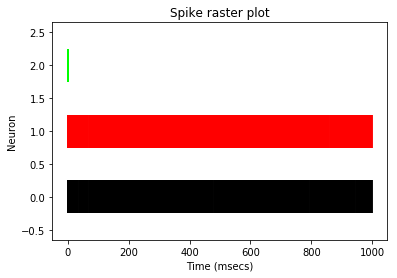

In [270]:
learning_rate=0.01
minimum_potential=-0.3
threshold_potential=10
resting_potential=0
delay=2
A_minus=0.3
A_plus=0.8
tau_minus=5
tau_plus=8
w_max=0
w_min=1

plotter=Spike_Plotter()

spikes_per_second=100
T=1000
data=Data(spikes_per_second,T)
print("Data Established")

network=Spiking_Neural_Network_Manager()
network.Establish_Parameters(learning_rate,minimum_potential,threshold_potential,resting_potential,delay,A_minus,A_plus,tau_minus,tau_plus,w_max,w_min)
network.Establish_Network(2)
network.Add_New_Layer(1)
print("Network Constructed")

x,y=data.Generate_Data('AND')
network.Train(x,y)
print("Training Complete")

x_1_1=[data.Encode(1),data.Encode(1)]
x_1_0=[data.Encode(1),data.Encode(0)]
x_0_1=[data.Encode(0),data.Encode(1)]
x_0_0=[data.Encode(0),data.Encode(0)]

y_1_1=network.Test(x_1_1)
print("Y's value is "+str(data.Decode(y_1_1[0])))

y_1_0=network.Test(x_1_0)
print("Y's value is "+str(data.Decode(y_1_0[0])))

y_0_1=network.Test(x_0_1)
print("Y's value is "+str(data.Decode(y_0_1[0])))

y_0_0=network.Test(x_0_0)
print("Y's value is "+str(data.Decode(y_0_0[0])))

plotter.Raster_Plot(x_1_1,y_1_1[0][:1000])